In [1]:
import numpy as np
import pandas as pd

In [2]:
fertilizer=pd.read_csv("Fertilizer Prediction.csv")
fertilizer.head()


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [3]:
fertilizer.shape


(99, 9)

In [4]:
fertilizer.info

<bound method DataFrame.info of     Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  \
0            26         52        38     Sandy      Maize        37   
1            29         52        45     Loamy  Sugarcane        12   
2            34         65        62     Black     Cotton         7   
3            32         62        34       Red    Tobacco        22   
4            28         54        46    Clayey      Paddy        35   
..          ...        ...       ...       ...        ...       ...   
94           25         50        32    Clayey     Pulses        24   
95           30         60        27       Red    Tobacco         4   
96           38         72        51     Loamy      Wheat        39   
97           36         60        43     Sandy    Millets        15   
98           29         58        57     Black  Sugarcane        12   

    Potassium  Phosphorous Fertilizer Name  
0           0            0            Urea  
1           0           3

In [5]:
fertilizer.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [6]:
fertilizer.duplicated().sum()

0

In [7]:
fertilizer.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [8]:
#exploring data
numeric_fertilizer = fertilizer.select_dtypes(include=['int64', 'float64'])
corr = numeric_fertilizer.corr()


<Axes: >

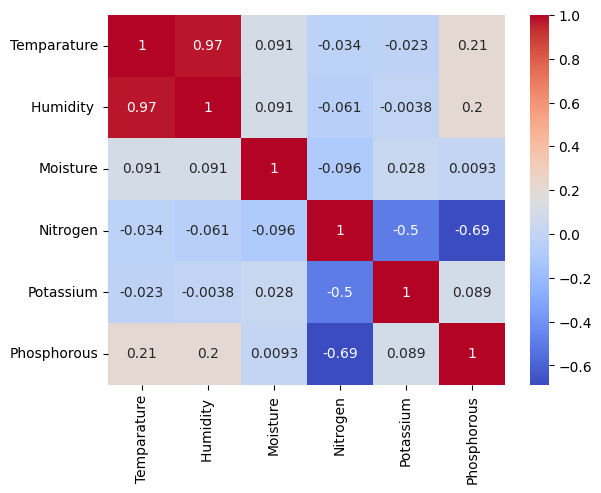

In [9]:
#analysis
import seaborn as sns
sns.heatmap(corr, annot=True,cbar=True,cmap='coolwarm')

In [10]:
fertilizer['Fertilizer Name'].value_counts()

Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

C:\Users\RAJ MOHNANI\AppData\Local\Temp\ipykernel_16152\3167043831.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fertilizer['Nitrogen'])


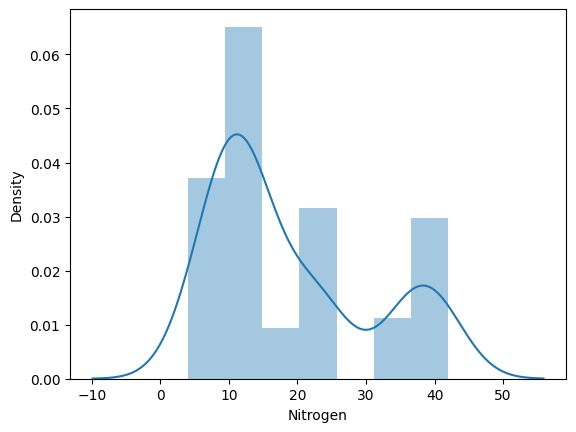

In [11]:
import matplotlib.pyplot as plt
sns.distplot(fertilizer['Nitrogen'])
plt.show()

In [12]:
#ENCODING
fertilizer_dict={
    'Urea':1,
    'DAP':2,
    '28-28':3,    
    '14-35-14':4,
    '20-20':5,
    '17-17-17':6,
    '10-26-26':7
}
fertilizer['Fertilizer_Num']=fertilizer['Fertilizer Name'].map(fertilizer_dict)

In [13]:
fertilizer['Fertilizer_Num'].value_counts()

Fertilizer_Num
1    22
2    18
3    17
4    14
5    14
6     7
7     7
Name: count, dtype: int64

In [14]:
fertilizer.drop('Fertilizer Name',axis=1,inplace=True)
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer_Num
0,26,52,38,Sandy,Maize,37,0,0,1
1,29,52,45,Loamy,Sugarcane,12,0,36,2
2,34,65,62,Black,Cotton,7,9,30,4
3,32,62,34,Red,Tobacco,22,0,20,3
4,28,54,46,Clayey,Paddy,35,0,0,1


In [15]:
#Training test Split

x=fertilizer.drop('Fertilizer_Num',axis=1)
y=fertilizer['Fertilizer_Num']

In [16]:
x.shape

(99, 8)

In [17]:
y.shape


(99,)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
x_train.shape

(79, 8)

In [21]:
x_test.shape

(20, 8)

In [22]:
#scale the feature using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

numeric_x_train = x_train.select_dtypes(include=['int64', 'float64'])
ms = MinMaxScaler()
ms.fit(numeric_x_train)
numeric_x_train_scaled = ms.transform(numeric_x_train)



In [23]:
x_train

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
49,33,64,51,Sandy,Maize,5,9,29
70,26,52,39,Clayey,Pulses,21,0,23
68,25,50,40,Clayey,Pulses,6,19,16
15,31,62,49,Black,Sugarcane,10,13,14
39,29,58,34,Sandy,Millets,15,0,37
...,...,...,...,...,...,...,...,...
60,28,54,41,Clayey,Paddy,36,0,0
71,31,62,32,Red,Tobacco,39,0,0
14,26,52,31,Red,Ground Nuts,14,0,41
92,36,68,41,Red,Ground Nuts,41,0,0


In [24]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Assuming 'x_train' is a DataFrame and you need to encode all categorical columns
label_encoder = LabelEncoder()

# Apply label encoding to all categorical columns
for column in x_train.select_dtypes(include=['object']).columns:
    x_train[column] = label_encoder.fit_transform(x_train[column])
    x_test[column] = label_encoder.transform(x_test[column])
sc=StandardScaler()
# Now apply standardization
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)


In [25]:
x_train

array([[ 0.76462082,  0.80219471,  0.71373089,  1.45583886, -0.73178566,
        -1.15292671,  0.91259936,  0.80677787],
       [-1.22988538, -1.23117583, -0.39185226, -0.7141851 ,  0.56733945,
         0.24967133, -0.63230099,  0.3465941 ],
       [-1.51481484, -1.57007092, -0.29972033, -0.7141851 ,  0.56733945,
        -1.06526433,  2.62915531, -0.19028696],
       [ 0.19476191,  0.46329962,  0.52946704, -1.43752643,  0.89212073,
        -0.71461482,  1.59922174, -0.34368155],
       [-0.37509701, -0.21449056, -0.8525119 ,  1.45583886, -0.40700439,
        -0.27630294, -0.63230099,  1.42035622],
       [ 1.6194092 ,  1.47998489, -0.48398419,  1.45583886, -1.7061295 ,
        -0.97760196,  0.91259936,  0.88347516],
       [-0.37509701, -0.21449056, -0.94464383, -1.43752643, -0.08222311,
        -0.8022772 ,  0.56928817,  0.88347516],
       [-0.09016755,  0.12440453, -0.29972033,  1.45583886, -0.40700439,
         2.00291888, -0.63230099, -1.41744366],
       [ 0.19476191,  0.46329962

In [26]:
#Training Models

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
models={
    'Logistic Regression':LogisticRegression(),
    'Naive Bayes':GaussianNB(),
    'Support Vector Machine':SVC(),
    'K-Nearest Neighbors':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Bagging':BaggingClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'Gradient Boosting':GradientBoostingClassifier(),
    'Extra Trees':ExtraTreeClassifier(),  
}

for name, md in models.items():
    md.fit(x_train,y_train)
    ypred=md.predict(x_test)

    print(f"{name} with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression with accuracy : 0.9
Naive Bayes with accuracy : 1.0
Support Vector Machine with accuracy : 0.8
K-Nearest Neighbors with accuracy : 0.6
Decision Tree with accuracy : 1.0
Random Forest with accuracy : 0.95
Bagging with accuracy : 1.0


C:\Users\RAJ MOHNANI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost with accuracy : 0.7
Gradient Boosting with accuracy : 0.95
Extra Trees with accuracy : 0.7


In [27]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
ypred=rfc.predict(x_test)
accuracy_score(y_test,ypred)

1.0

In [28]:
#predictive system 

def recommendation(Temparature,	Humidity,	Moisture,	Soil_Type,	Crop_Type,	Nitrogen,	Potassium,	Phosphorous):
    features = np.array([[Temparature,	Humidity,	Moisture,	Soil_Type,	Crop_Type,	Nitrogen,	Potassium,	Phosphorous]])
    prediction = rfc.predict(features).reshape(1,-1)

    return prediciton[0]

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define all possible values for encoding
Soil_Type_labels = ['Loamy', 'Sandy', 'Clayey', 'Black', 'Red']
Crop_Type_labels = ['Sugarcane', 'Cotton', 'Millets', 'Paddy', 'Pulses', 'Wheat', 'Tobacco', 'Barley', 'Oil seeds', 'Ground Nuts', 'Maize']

# Initialize LabelEncoders and fit them
label_encoder_soil = LabelEncoder().fit(Soil_Type_labels)
label_encoder_crop = LabelEncoder().fit(Crop_Type_labels)

# Sample training data
# Format: [Soil_Type, Nitrogen, Phosphorus, Potassium, Temperature, Crop_Type]
# Encode categorical features
X_train = np.array([
    [label_encoder_soil.transform(['Loamy'])[0], 20, 30, 40, 50, label_encoder_crop.transform(['Sugarcane'])[0]],
    [label_encoder_soil.transform(['Sandy'])[0], 15, 25, 35, 45, label_encoder_crop.transform(['Cotton'])[0]],
    [label_encoder_soil.transform(['Clayey'])[0], 30, 40, 50, 60, label_encoder_crop.transform(['Paddy'])[0]],
    [label_encoder_soil.transform(['Black'])[0], 10, 20, 30, 40, label_encoder_crop.transform(['Millets'])[0]],
    [label_encoder_soil.transform(['Red'])[0], 25, 35, 45, 55, label_encoder_crop.transform(['Wheat'])[0]],
    # Add more training samples as needed
])

# Target labels (e.g., fertilizer types) for training data
y_train = np.array([1, 2, 3, 4, 5])  # Example target values; should correspond to actual labels

# Initialize and train the model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Define the recommendation function
def recommendation(soil_color, nitrogen, phosphorus, potassium, temperature, crop):
    try:
        # Encode the inputs
        soil_color_encoded = label_encoder_soil.transform([soil_color])[0]
        crop_encoded = label_encoder_crop.transform([crop])[0]
    except ValueError as e:
        # Handle the case where a label is not present in the encoder
        print(f"Error encoding inputs: {e}")
        return None
    
    # Create feature array with encoded values
    features = np.array([[soil_color_encoded, nitrogen, phosphorus, potassium, temperature, crop_encoded]])
    
    # Make a prediction using the trained model
    prediction = rfc.predict(features)
    
    return prediction

# Example usage
Temparature = 29
Humidity = 56
Moisture = 45
Soil_Type = 'Red'
Crop_Type = 'Sugarcane'
Nitrogen = 16
Potassium = 200
Phosphorous = 36

# Get the prediction
predict = recommendation(Soil_Type, Nitrogen, Phosphorous, Potassium, Temparature, Crop_Type)

# Map the prediction to the corresponding fertilizer
fertilizer_dict = {1: "Urea", 2: "DAP", 3: "28-28", 4: "14-35-14", 5: "20-20", 6: "17-17-17", 7: "10-26-26"}

if predict is not None and predict[0] in fertilizer_dict:
    fertilizer = fertilizer_dict[predict[0]]
    print("{} is the best fertilizer that is suitable".format(fertilizer))
else:
    print("Sorry, we are not able to recommend a proper fertilizer for this environment.")


20-20 is the best fertilizer that is suitable


In [30]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
